# Exploratory Data Analysis on Dataset - Terrorism

The dataset used for this exploratory data analysis focuses on terrorism incidents worldwide. Terrorism has been a persistent global issue, and analyzing the data related to these incidents can provide valuable insights into the patterns, trends, and hot zones associated with terrorism.

# Data Preparation

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('rainbow')

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Data
df = pd.read_csv(r"C:\Users\avani\Downloads\Global Terrorism - START data (1)\globalterrorismdb_0718dist.csv",encoding='latin1')
df.head()  

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
# Showing no. of rows and columns in a dataset
df.shape

(181691, 135)

In [4]:
# Showing Columns of the Data 
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

# Data Preprocessing & Cleaning

In [5]:
# Showing Data Types of the columns
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

There are so many Columns . So, we will extract only Important Columns which have more use in Data Analysis and Visualization.

In [6]:
# Extracting Important Columns
df = df[['iyear','imonth','iday','country_txt','provstate','region_txt',
                       'attacktype1_txt','target1','nkill','nwound','summary','gname', 
                       'targtype1_txt','weaptype1_txt','motive']]

In [7]:
# Renaming of Columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [8]:
df.head()

,Year,Month,Day,Country,State,Region,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [9]:
# Checking for duplicated values
df.duplicated().sum()

10095

In [10]:
# Dropping Duplicated Values
df.drop_duplicates(inplace=True)
df.shape

(171596, 15)

In [11]:
## Checking for duplicated values
df.duplicated().any()

False

In [12]:
# Checking No. of unique values in the columns
df.nunique()

Year               47
Month              13
Day                32
Country           205
State            2855
Region             12
AttackType          9
Target          86006
Killed            205
Wounded           238
Summary        112492
Group            3537
Target_type        22
Weapon_type        12
Motive          14490
dtype: int64

In [13]:
# Checking for null values
df.isna().sum().sort_values()

Year                0
Month               0
Day                 0
Country             0
Region              0
AttackType          0
Group               0
Target_type         0
Weapon_type         0
State             421
Target            539
Killed           9263
Wounded         15091
Summary         58623
Motive         121735
dtype: int64

In [14]:
# Counting Values of State Column 
df['State'].value_counts()

Baghdad                  7625
Northern Ireland         4275
Unknown                  3732
Balochistan              3669
Saladin                  3145
                         ... 
East Timor (Region)         1
Berber (Province)           1
Montenegro (Republic)       1
Vukovar-Syrmia              1
Vidzeme                     1
Name: State, Length: 2855, dtype: int64

In [15]:
# Treating Null Values in State Column
df['State'] = df['State'].replace({'Unknown': np.nan})
df['State'] = df['State'].fillna("Others")
df['State'].value_counts()

Baghdad                  7625
Northern Ireland         4275
Others                   4153
Balochistan              3669
Saladin                  3145
                         ... 
East Timor (Region)         1
Berber (Province)           1
Montenegro (Republic)       1
Vukovar-Syrmia              1
Vidzeme                     1
Name: State, Length: 2855, dtype: int64

In [16]:
# Checking for null values
df['State'].isna().any()

False

In [17]:
# Counting values for Target Column
df['Target'].value_counts()

Civilians                           6365
Unknown                             5493
Soldiers                            3090
Patrol                              2929
Checkpoint                          2768
                                    ... 
Israel undercover military unit        1
branch, Coleman Street                 1
Residence Royal Family Member          1
10 Persons Worshipping in mosque       1
Hmeymim Air Base                       1
Name: Target, Length: 86006, dtype: int64

In [18]:
# Treating Null Values in Target Column
df['Target'] = df['Target'].replace({'Unknown': np.nan})
df['Target'] = df['Target'].fillna("Others")
df['Target'].value_counts()

Civilians                           6365
Others                              6032
Soldiers                            3090
Patrol                              2929
Checkpoint                          2768
                                    ... 
Israel undercover military unit        1
branch, Coleman Street                 1
Residence Royal Family Member          1
10 Persons Worshipping in mosque       1
Hmeymim Air Base                       1
Name: Target, Length: 86006, dtype: int64

In [19]:
# Checking for null values
df['Target'].isnull().any()

False

Handling Null Values in KIlled and Wounded column

In [20]:
# Counting Values for Killed Column and Wounded Column
print(df['Killed'].value_counts())
print(df['Wounded'].value_counts())

0.0      80199
1.0      35934
2.0      14021
3.0       7667
4.0       4932
         ...  
275.0        1
320.0        1
104.0        1
271.0        1
311.0        1
Name: Killed, Length: 205, dtype: int64
0.0      95070
1.0      15736
2.0      10116
3.0       7230
4.0       4850
         ...  
727.0        1
216.0        1
751.0        1
233.0        1
316.0        1
Name: Wounded, Length: 238, dtype: int64


<AxesSubplot:>

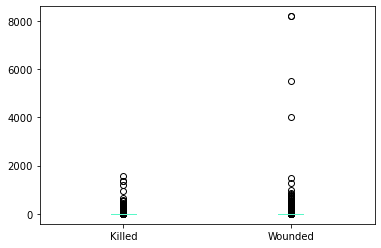

In [21]:
# Checking for Outliers in Killed and Wouded Column
df[['Killed','Wounded']].plot(kind='box')

In [22]:
# Treating Null Values in Killed and Wounded Column with median
df[['Killed', 'Wounded']] = df[['Killed', 'Wounded']].fillna(df[['Killed', 'Wounded']].mean())
df[['Killed','Wounded']].isnull().any()

Killed     False
Wounded    False
dtype: bool

Summary and Motive Column are having so many null values . So, we will drop null values of 'Summary' and 'Motive' Column.

In [23]:
# Dropping Null Values of Summary and Motive Column
df = df.dropna(subset=['Summary'])
df = df.dropna(subset=['Motive'])

In [24]:
# Checking for null values
df[['Summary','Motive']].isna().any()

Summary    False
Motive     False
dtype: bool

In [25]:
# checking Unique Values of Day Column
df['Day'].unique()

array([ 1,  2,  3,  6,  9, 12, 13, 19, 22, 25, 26, 27, 30,  4,  8, 15, 16,
       17, 21, 23, 24,  5, 10, 11, 14, 20, 31,  0, 29,  7, 18, 28],
      dtype=int64)

Here 0 is also considered as Day which is not in actual so we will replace this value with Nan and drop this Nan Value

In [26]:
# Changing Data of Day Column
df['Day'] = df['Day'].replace(0,np.nan)
df = df.dropna(subset=['Day'])

# Checking no. of unique values in Day Column
print(df['Day'].nunique())

# Checking for null values
print(df['Day'].isnull().any())

31
False


In [27]:
# Checking for Null Values
df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
State          0
Region         0
AttackType     0
Target         0
Killed         0
Wounded        0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

In [28]:
df.head()

,Year,Month,Day,Country,State,Region,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive
5,1970,1,1.0,United States,Illinois,North America,Armed Assault,Cairo Police Headquarters,0.0,0.0,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment
8,1970,1,2.0,United States,Wisconsin,North America,Facility/Infrastructure Attack,"R.O.T.C. offices at University of Wisconsin, M...",0.0,0.0,"1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft
9,1970,1,3.0,United States,Wisconsin,North America,Facility/Infrastructure Attack,Selective Service Headquarters in Madison Wisc...,0.0,0.0,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft
11,1970,1,6.0,United States,Colorado,North America,Facility/Infrastructure Attack,"Army Recruiting Station, Denver Colorado",0.0,0.0,1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War
14,1970,1,9.0,United States,Puerto Rico,North America,Facility/Infrastructure Attack,Baker's Store,0.0,0.0,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...


In [29]:
# Resetting index
df.reset_index(inplace=True,drop=True)
df.head()

,Year,Month,Day,Country,State,Region,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive
0,1970,1,1.0,United States,Illinois,North America,Armed Assault,Cairo Police Headquarters,0.0,0.0,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment
1,1970,1,2.0,United States,Wisconsin,North America,Facility/Infrastructure Attack,"R.O.T.C. offices at University of Wisconsin, M...",0.0,0.0,"1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft
2,1970,1,3.0,United States,Wisconsin,North America,Facility/Infrastructure Attack,Selective Service Headquarters in Madison Wisc...,0.0,0.0,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft
3,1970,1,6.0,United States,Colorado,North America,Facility/Infrastructure Attack,"Army Recruiting Station, Denver Colorado",0.0,0.0,1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War
4,1970,1,9.0,United States,Puerto Rico,North America,Facility/Infrastructure Attack,Baker's Store,0.0,0.0,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...


In [30]:
# Showing Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49581 entries, 0 to 49580
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         49581 non-null  int64  
 1   Month        49581 non-null  int64  
 2   Day          49581 non-null  float64
 3   Country      49581 non-null  object 
 4   State        49581 non-null  object 
 5   Region       49581 non-null  object 
 6   AttackType   49581 non-null  object 
 7   Target       49581 non-null  object 
 8   Killed       49581 non-null  float64
 9   Wounded      49581 non-null  float64
 10  Summary      49581 non-null  object 
 11  Group        49581 non-null  object 
 12  Target_type  49581 non-null  object 
 13  Weapon_type  49581 non-null  object 
 14  Motive       49581 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 5.7+ MB


In [31]:
# Showing Statistical Summary of Numerical Columns
df.describe()

,Year,Month,Day,Killed,Wounded
count,49581.000000,49581.000000,49581.000000,49581.000000,49581.000000
mean,2007.887477,6.481818,15.349106,2.815867,4.923010
std,6.485076,3.385679,8.789358,16.281711,57.793995
min,1970.000000,1.000000,1.000000,0.000000,0.000000
25%,2005.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,7.000000,15.000000,1.000000,0.000000
75%,2011.000000,9.000000,23.000000,2.000000,3.322418
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


In [32]:
# showing Summary of Categorical Columns
df.describe(include='O')

,Country,State,Region,AttackType,Target,Summary,Group,Target_type,Weapon_type,Motive
count,49581,49581,49581,49581,49581,49581,49581,49581,49581,49581
unique,165,1907,12,9,34385,49429,1430,22,12,14387
top,Iraq,Baghdad,South Asia,Bombing/Explosion,Civilians,06/13/2007: A total of four Iraqi civilians we...,Unknown,Private Citizens & Property,Explosives,Unknown
freq,9299,3752,16637,24303,2455,4,24568,15063,25547,14685


# Data Visualization

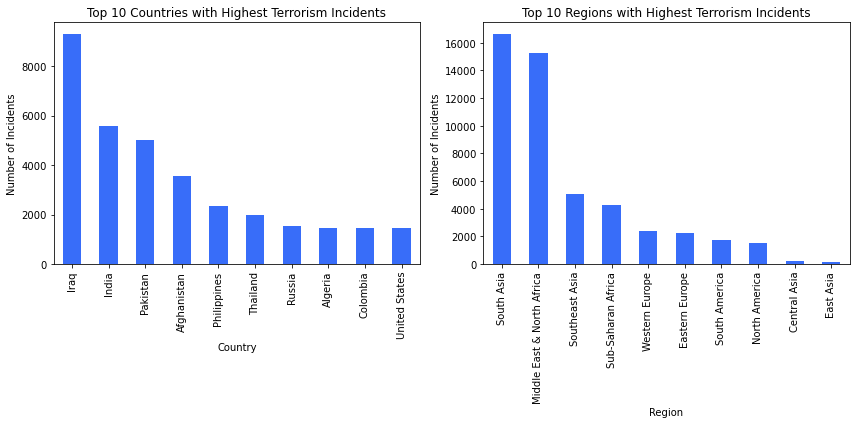

In [33]:
# Filter relevant columns
df_hotzones = df[['Country', 'Region']]

# Count occurrences
country_counts = df_hotzones['Country'].value_counts()
region_counts = df_hotzones['Region'].value_counts()

# Identify hot zones
top_countries = country_counts.head(10)
top_regions = region_counts.head(10)

# Visualize the hot zones
plt.figure(figsize=(12, 6))

# Plot the top countries with the highest number of terrorist incidents
plt.subplot(1, 2, 1)
top_countries.plot(kind='bar')
plt.title('Top 10 Countries with Highest Terrorism Incidents')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')

# Plot the top regions with the highest number of terrorist incidents
plt.subplot(1, 2, 2)
top_regions.plot(kind='bar')
plt.title('Top 10 Regions with Highest Terrorism Incidents')
plt.xlabel('Region')
plt.ylabel('Number of Incidents')

plt.tight_layout()
plt.show()


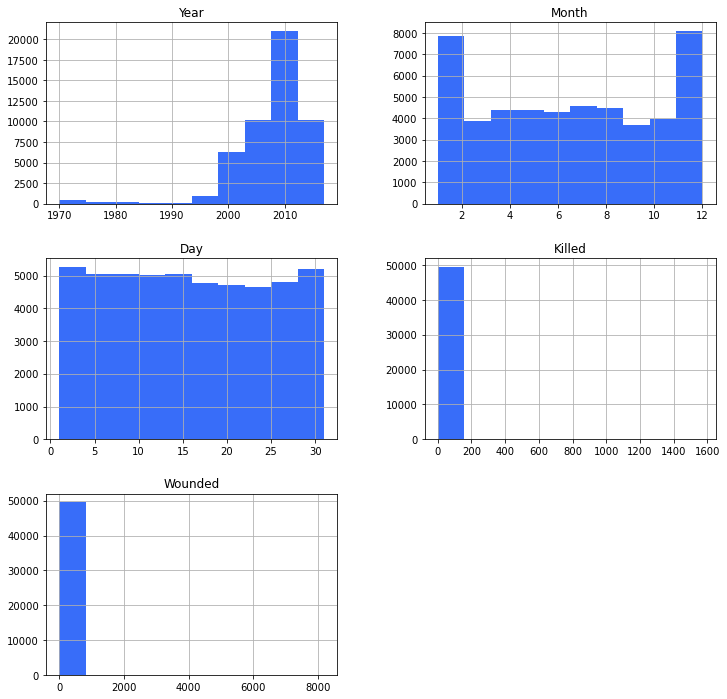

In [34]:
df.hist(figsize=(12,12))
plt.show()

### Year Wise:

1. Attacks Per Year

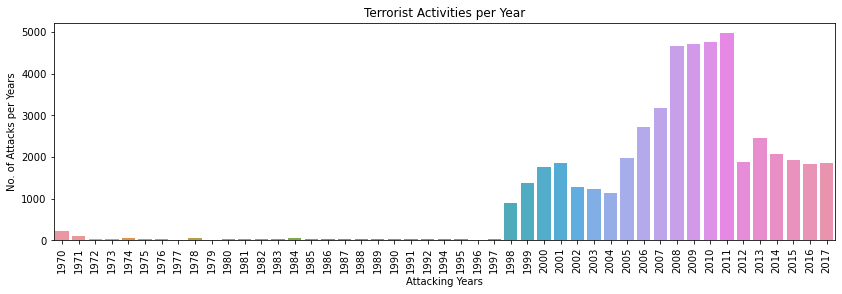

In [35]:
# Plotting Countplot to show Attacks per Year
plt.figure(figsize=(14,4))
sns.countplot(x = df['Year'])
plt.title('Terrorist Activities per Year')
plt.xlabel('Attacking Years')
plt.ylabel('No. of Attacks per Years')
plt.xticks(rotation=90)
plt.show()

2. No. of People Killed per Year

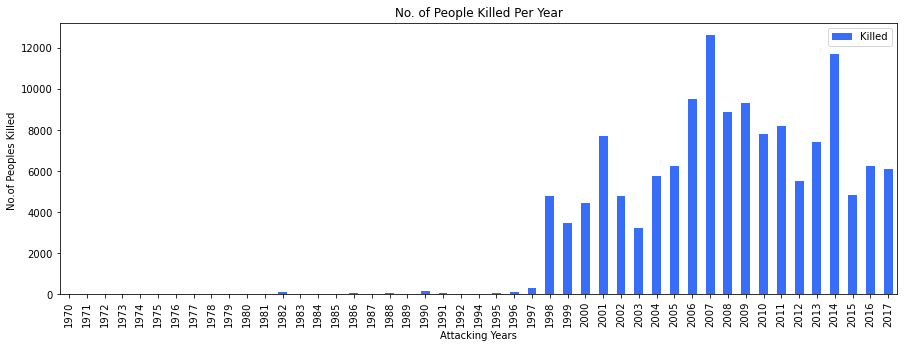

In [36]:
# Showing Peoples Kiled Per Year
kill_per_year = df[['Year','Killed']].groupby('Year').sum()
kill_per_year.plot(kind='bar', figsize=(15,5), title = 'No. of People Killed Per Year')
plt.xlabel('Attacking Years')
plt.ylabel('No.of Peoples Killed ')
plt.show()

3 No. of People Wounded Per Year 

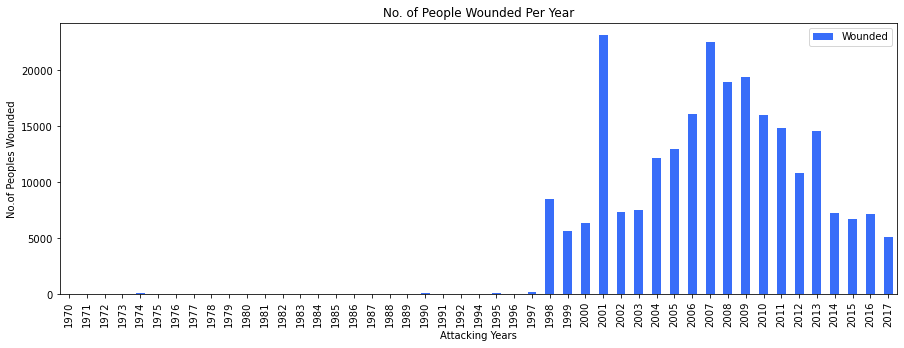

In [37]:
wounded_per_year = df[['Year','Wounded']].groupby('Year').sum()
wounded_per_year.plot(kind='bar', figsize=(15,5), title = 'No. of People Wounded Per Year')
plt.xlabel('Attacking Years')
plt.ylabel('No.of Peoples Wounded')
plt.show()

###  Month Wise:

1. Attacks Per Month

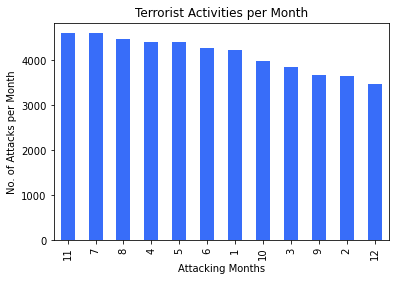

In [38]:
df['Month'].value_counts().plot(kind='bar', title = 'Terrorist Activities per Month')
plt.xlabel('Attacking Months')
plt.ylabel('No. of Attacks per Month')
plt.show()


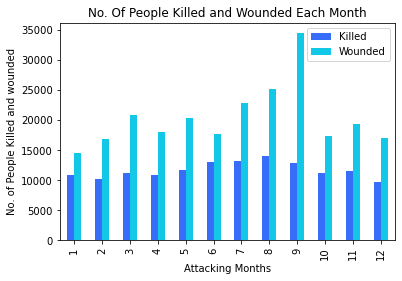

In [39]:
kill_wounded_per_month = df[['Killed','Wounded','Month']].groupby('Month').sum()
kill_wounded_per_month.plot(kind='bar', title = 'No. Of People Killed and Wounded Each Month')
plt.xlabel('Attacking Months')
plt.ylabel('No. of People Killed and wounded')
plt.show()

###  Country Wise

Top 20 Countries Which are Mostly Attacked

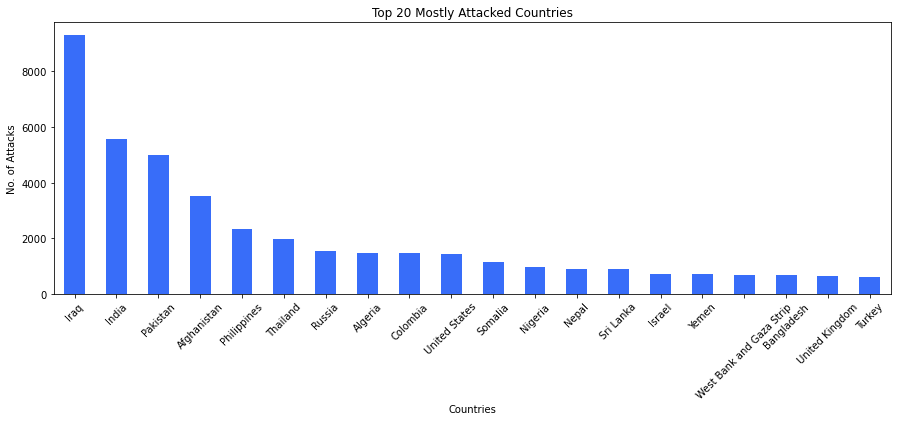

In [40]:
plt.figure(figsize=(15,5))
most_attack_countries = df['Country'].value_counts().head(20)
most_attack_countries.plot(kind='bar')
plt.title('Top 20 Mostly Attacked Countries')
plt.xlabel('Countries')
plt.ylabel('No. of Attacks')
plt.xticks(rotation=45)
plt.show()

###  State Wise:

Top 10 Mostly Attacked States

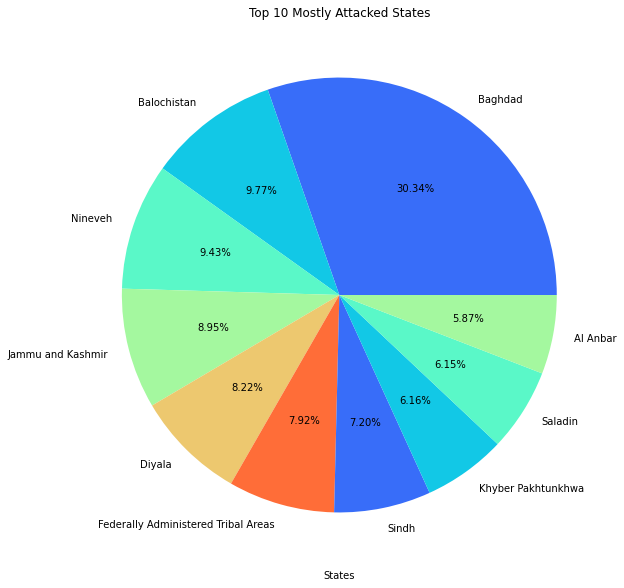

In [41]:
plt.figure(figsize=(15,10))
most_attack_countries = df['State'].value_counts().head(10)
most_attack_countries.plot(kind='pie',autopct = '%.2f%%')
plt.title('Top 10 Mostly Attacked States')
plt.xlabel('States')
plt.ylabel(None)
plt.show()

###  Region Wise:

Top 7 Most Affected Regions by Terrorist  Attacks

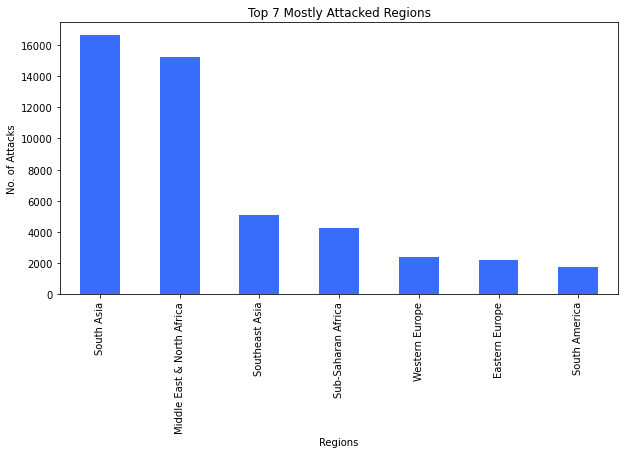

In [42]:
plt.figure(figsize=(10,5))
most_attack_regions = df['Region'].value_counts().head(7)
most_attack_regions.plot(kind='bar')
plt.title('Top 7 Mostly Attacked Regions')
plt.xlabel('Regions')
plt.ylabel('No. of Attacks')
plt.xticks(rotation=90)
plt.show()

Insights
1. The above image shows the Top Regions in terms of most number of Terrorist Attacks.
2. The most affected Region by terrorist attacks is South Asia.
3. The top 5 Regions most affected by terrorist attacks are South Asia,  Middle East & North Africa, Southeast Asia, Sub-Saharan Africa, Western Europe.


### AttackType Wise:

Types of Attack Types Used

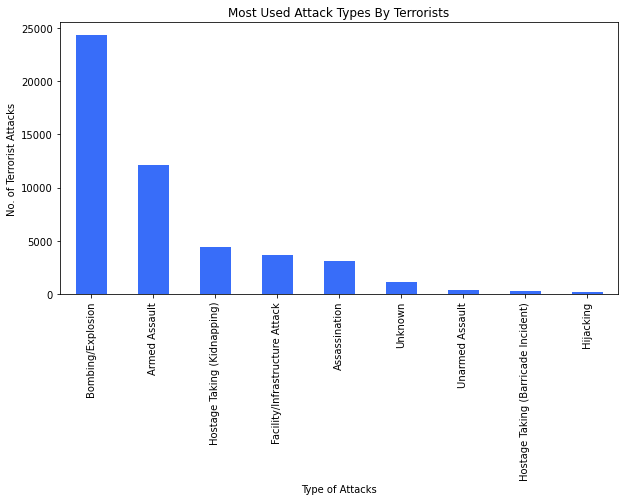

In [43]:
# Plotting Most Used Attacks Types by Terrorist
plt.figure(figsize=(10,5))
most_attack_regions = df['AttackType'].value_counts()
most_attack_regions.plot(kind='bar')
plt.title('Most Used Attack Types By Terrorists')
plt.xlabel('Type of Attacks')
plt.ylabel('No. of Terrorist Attacks')
plt.xticks(rotation=90)
plt.show()

### Target Wise:

In [44]:
df['Target'].value_counts()

Civilians                                              2455
Others                                                 1567
Soldiers                                                242
Officers                                                234
Checkpoint                                              197
                                                       ... 
A police convoy in Sangin (District)                      1
Algerian soldiers on a search operation in Zemmouri       1
Bogota civilians                                          1
former (District) Chief, Abdul Hakim Khan                 1
Migrant Center                                            1
Name: Target, Length: 34385, dtype: int64

Top 10 Most Target Peoples by Terrorists Attacks

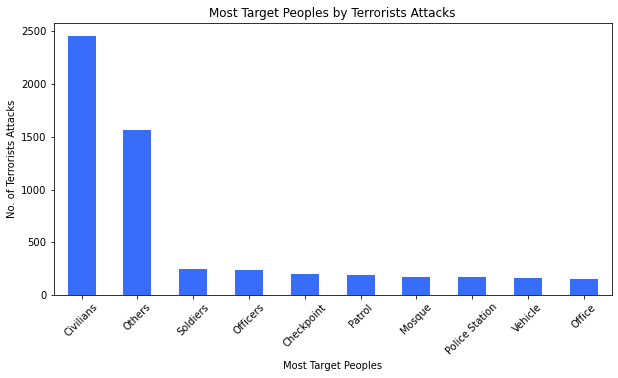

In [45]:
plt.figure(figsize=(10,5))
most_target_peoples = df['Target'].value_counts().head(10)
most_target_peoples.plot(kind='bar')
plt.title('Most Target Peoples by Terrorists Attacks')
plt.xlabel('Most Target Peoples')
plt.ylabel('No. of Terrorists Attacks')
plt.xticks(rotation=45)
plt.show()


### Group Wise

Groups with Most Terrorists Attacks.


In [46]:
terr_groups = df['Group'].value_counts()
terr_groups

Unknown                                           24568
Taliban                                            2099
Communist Party of India - Maoist (CPI-Maoist)     1663
Islamic State of Iraq and the Levant (ISIL)         928
Revolutionary Armed Forces of Colombia (FARC)       884
                                                  ...  
Zapatista National Liberation Army                    1
Sisters in Arms                                       1
Haika                                                 1
Rebellious Group Lambros Foundas                      1
Fatoni Warriors                                       1
Name: Group, Length: 1430, dtype: int64

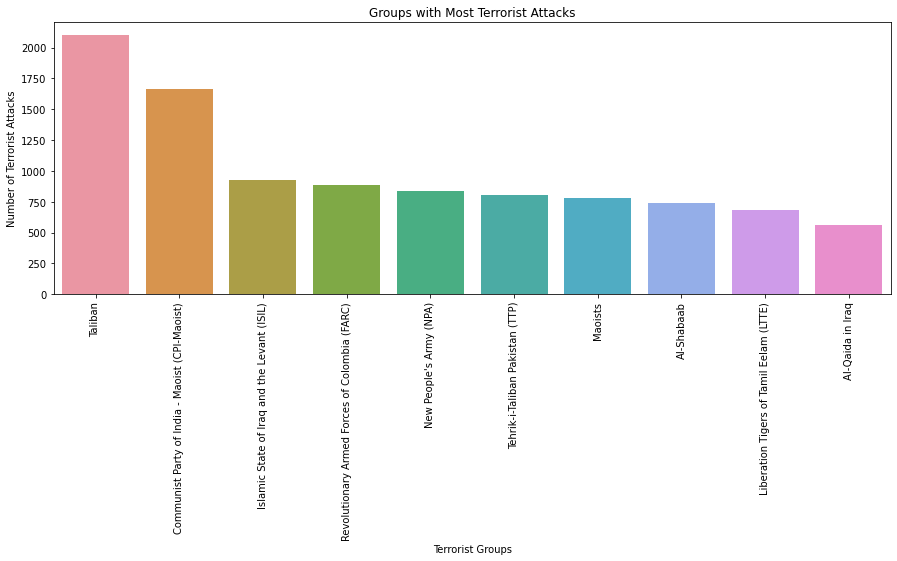

In [47]:
# Plotting Top 10 Groups Most Terrorist Attacks
fig = plt.figure(figsize=(15,5))
sns.barplot(x= terr_groups[1:11].index, y = terr_groups[1:11].values)
plt.title('Groups with Most Terrorist Attacks')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of Terrorist Attacks')
plt.xticks(rotation=90)
plt.show()

### Target Wise:

Most Frequent Targets of Terrorists.

In [48]:
targets = df['Target_type'].value_counts()
targets

Private Citizens & Property       15063
Government (General)               7182
Police                             6145
Business                           5250
Military                           4208
Transportation                     2050
Religious Figures/Institutions     1795
Educational Institution            1697
Utilities                          1028
Terrorists/Non-State Militia        835
Government (Diplomatic)             808
Journalists & Media                 796
Unknown                             631
Violent Political Party             499
NGO                                 402
Telecommunication                   376
Airports & Aircraft                 239
Abortion Related                    199
Tourists                            144
Maritime                             88
Food or Water Supply                 86
Other                                60
Name: Target_type, dtype: int64

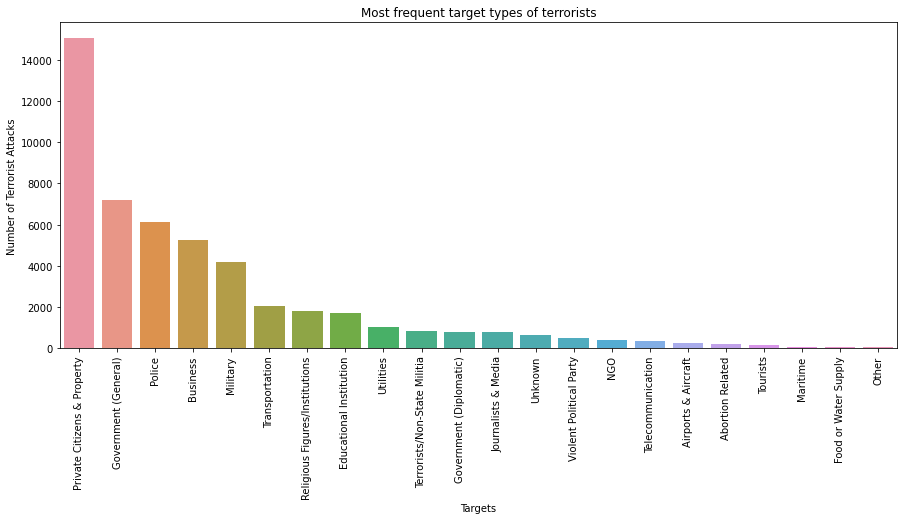

In [49]:
fig = plt.figure(figsize=(15,6))
sns.barplot(x = targets.index, y = targets.values)
plt.title("Most frequent target types of terrorists")
plt.xlabel("Targets")
plt.ylabel("Number of Terrorist Attacks")
plt.xticks(rotation=90)
plt.show()

### Weapon_type:

Most Weapon Type Used

In [50]:
weapon_used = df['Weapon_type'].value_counts().head()
weapon_used

Explosives    25547
Firearms      15549
Incendiary     3520
Unknown        3248
Melee          1342
Name: Weapon_type, dtype: int64

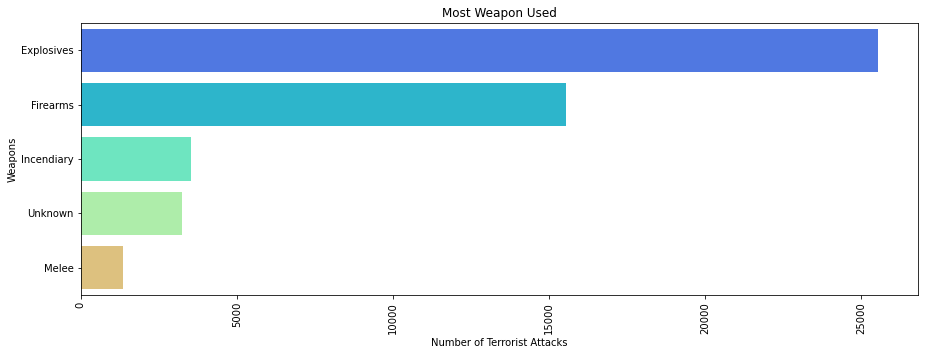

In [51]:
fig = plt.figure(figsize=(15,5))
sns.barplot(y = weapon_used.index, x = weapon_used.values)
plt.title("Most Weapon Used")
plt.xlabel("Number of Terrorist Attacks")
plt.ylabel("Weapons")
plt.xticks(rotation=90)
plt.show()

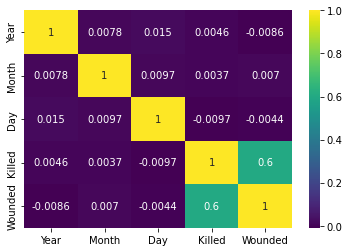

In [52]:
# Showing Correlation Between different Columns
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

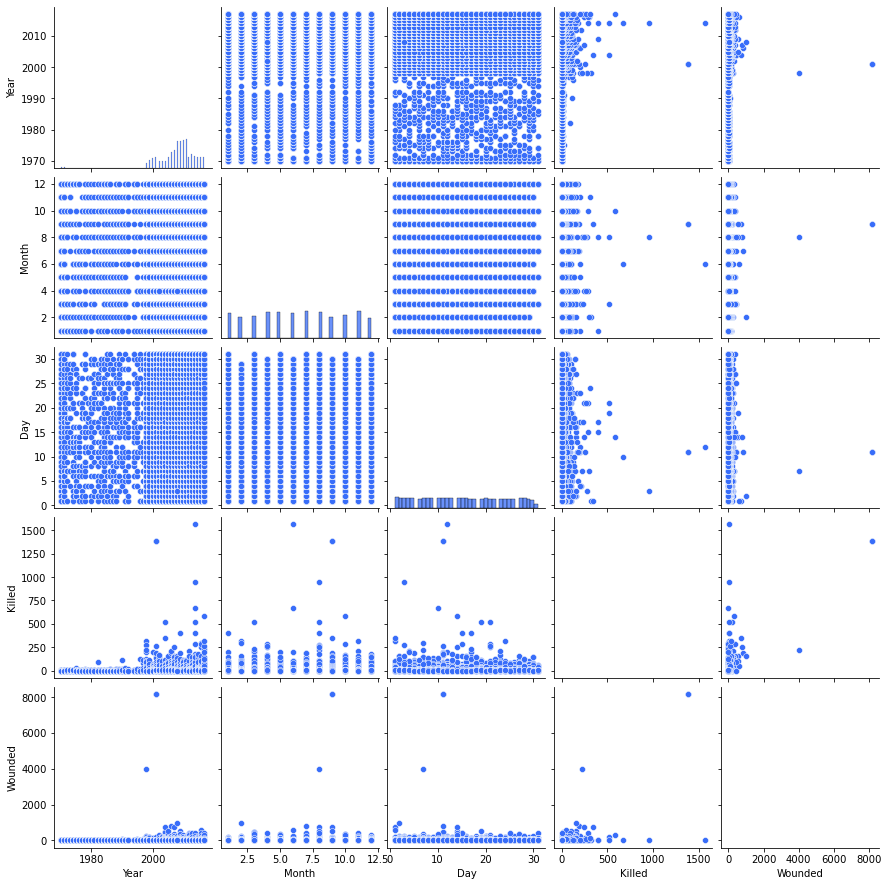

In [53]:
sns.pairplot(df)

In [54]:
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'AttackType',
       'Target', 'Killed', 'Wounded', 'Summary', 'Group', 'Target_type',
       'Weapon_type', 'Motive'],
      dtype='object')

# Gathering Insights From The Data

1. Year with Most Number of People Wounded - 2001
2. Country with Most Attacks - Iraq
3. Year with Most Number of People Killed - 2007
4. Most frequent Weapon Used - Explosives.
5. Month in which Most No. of People Killed - August
6. Month in which Most No. of People Wounded - September
7. Year with Most Number of Attacks - 2011
8. State with Most Attacks - Baghdad
9. Region with most Attacks - SouthAsia
10. Most frequent Target Types - Private Citizens and Property
11. Most Used Attack Types by terrorists - Bombing/Explosion
12. Most Targeted People - Civillians
13. Group with most nO. of attacks - Taliban
14. Month with Most No. of Attacks - November


